In [31]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [32]:
### 1. Link notebook with google drive and access data from your personal Gdrive
## from google.colab import drive
## drive.mount('/content/drive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/drive/MyDrive/Bio Modelling & Simulation"
model_loc = "/content/drive/MyDrive/Bio Modelling & Simulation"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'/heart.csv')

['heart.csv']


### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

In [33]:
# Check the first few rows of the dataset
print(data.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [34]:
# Check the summary statistics of the dataset
print(data.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [35]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


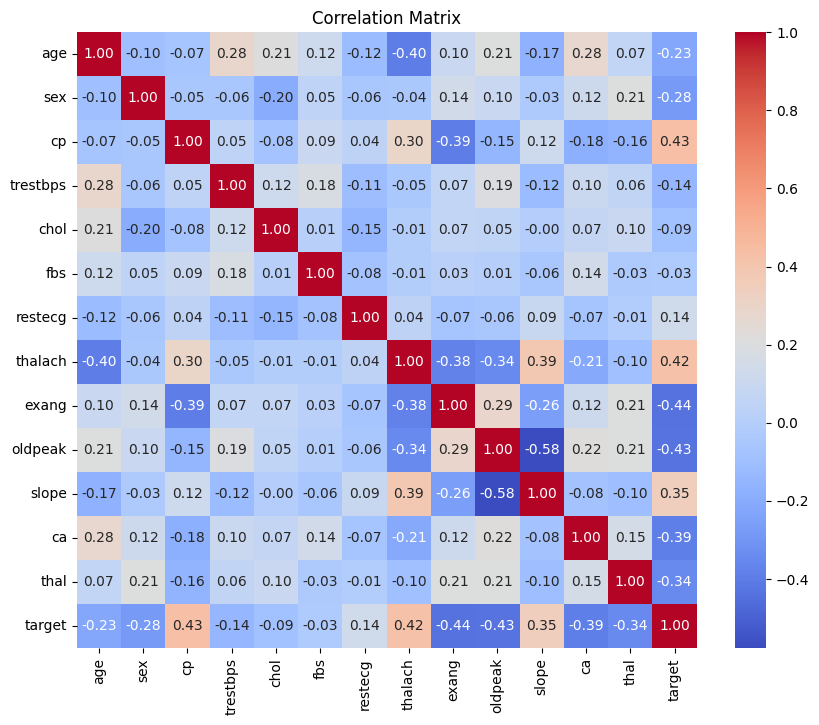

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [37]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

The code enables categorical encoding that is helpful for machine learning algorithms that need to encode numerical values for category variables and avoid any mathematical operation on those variables

In [38]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data_c = data.copy()
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'ca', 'thal']
for var in categorical_vars:
    data_c = pd.concat([data_c, pd.get_dummies(data_c[var], prefix=var)], axis=1)
    data_c.drop(var, axis=1, inplace=True)

<ipython-input-38-cadaddebefd1>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_c = pd.concat([data_c, pd.get_dummies(data_c[var], prefix=var)], axis=1)
<ipython-input-38-cadaddebefd1>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_c = pd.concat([data_c, pd.get_dummies(data_c[var], prefix=var)], axis=1)
<ipython-input-38-cadaddebefd1>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_c = pd.concat([data_c, pd.get_dummies(data_c[var], prefix=var)], axis=1)
<ipython-input-38-cadaddebefd1>:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data_c = pd.concat

In [39]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values #extract value from variable target in data and assigned to y
y = y.reshape(y.shape[0],1) #reshape y to have the same number of rows and set the second dimension to y
x = data.drop(['target'],axis=1) #drop the column target
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 13)
Shape of y: (303, 1)


In [40]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

np.random.seed(0)
data_simple = pd.DataFrame({
    'Feature1': np.random.randint(0, 100, 10),
    'Feature2': np.random.randint(0, 100, 10)
})

print("Original Dataset:")
print(data_simple)

mean = data_simple.mean()
std_dev = data_simple.std()
data_normalized = (data_simple - mean) / std_dev

print("\nNormalized Dataset:")
print(data_normalized)

Original Dataset:
   Feature1  Feature2
0        44        70
1        47        88
2        64        88
3        67        12
4        67        58
5         9        65
6        83        39
7        21        87
8        36        46
9        87        88

Normalized Dataset:
   Feature1  Feature2
0 -0.331071  0.228832
1 -0.214222  0.926965
2  0.447920  0.926965
3  0.564768 -2.020706
4  0.564768 -0.236589
5 -1.694305  0.034907
6  1.187961 -0.973507
7 -1.226911  0.888180
8 -0.642667 -0.702011
9  1.343759  0.926965


In [41]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.708333,1.0,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.25,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.5625,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.0,0.245283,0.520548,0.0,0.5,0.70229,1.0,0.096774,1.0,0.0,0.666667


The features of the dataset was scaled to the range of 0 to 1

In [47]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(193, 13)
(49, 13)
(61, 13)


In [50]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=13, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                896       
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

In [52]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

x_train = np.array(x_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
x_val = np.array(x_val, dtype=np.float32)
y_val = np.array(y_val, dtype=np.float32)

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
13/13 [==============================] - 1s 28ms/step - loss: 0.2478 - acc: 0.5648 - val_loss: 0.2524 - val_acc: 0.4898
Epoch 2/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2461 - acc: 0.5648 - val_loss: 0.2562 - val_acc: 0.4898
Epoch 3/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2447 - acc: 0.5648 - val_loss: 0.2563 - val_acc: 0.4898
Epoch 4/1000
13/13 [==============================] - 0s 8ms/step - loss: 0.2437 - acc: 0.5648 - val_loss: 0.2571 - val_acc: 0.4898
Epoch 5/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2408 - acc: 0.5648 - val_loss: 0.2528 - val_acc: 0.4898
Epoch 6/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2349 - acc: 0.5648 - val_loss: 0.2420 - val_acc: 0.4898
Epoch 7/1000
13/13 [==============================] - 0s 7ms/step - loss: 0.2283 - acc: 0.5751 - val_loss: 0.2323 - val_acc: 0.6327
Epoch 8/1000
13/13 [==============================] - 0s 7ms/step - loss: 0

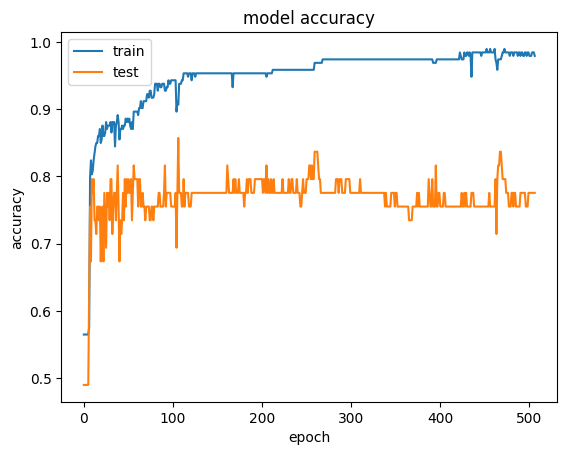

In [54]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

It visualize the model's accuracy over the epoch and help to determine whether the model is overfitting or undefitting

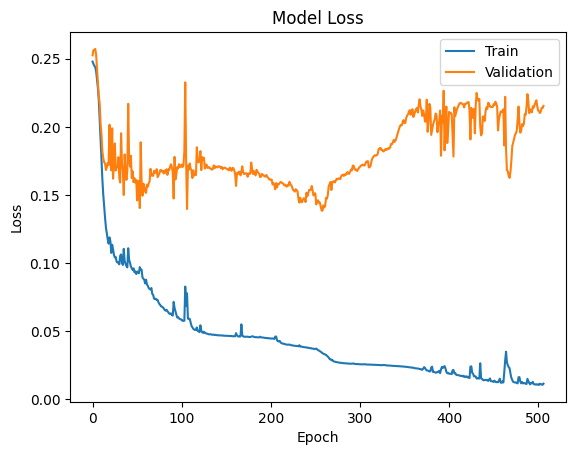

In [55]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [57]:
### 14. What is the purpose of evaluating the model on the test dataset?
# To assess the performance of the dataset on unused data
#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
x_test = np.array(x_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

2/2 [==============================] - 0s 8ms/step - loss: 0.1886 - acc: 0.8033

acc: 80.33%
loss: 0.19


In [58]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

2/2 [==============================] - 0s 8ms/step
No: 1 Actual: [0.]  Predicted: [0] Result: Pass
No: 2 Actual: [0.]  Predicted: [1]  Result: Fail
No: 3 Actual: [1.]  Predicted: [1] Result: Pass
No: 4 Actual: [0.]  Predicted: [0] Result: Pass
No: 5 Actual: [1.]  Predicted: [0]  Result: Fail
No: 6 Actual: [1.]  Predicted: [1] Result: Pass
No: 7 Actual: [1.]  Predicted: [1] Result: Pass
No: 8 Actual: [0.]  Predicted: [0] Result: Pass
No: 9 Actual: [0.]  Predicted: [0] Result: Pass
No: 10 Actual: [1.]  Predicted: [0]  Result: Fail
No: 11 Actual: [1.]  Predicted: [1] Result: Pass
No: 12 Actual: [1.]  Predicted: [0]  Result: Fail
No: 13 Actual: [1.]  Predicted: [1] Result: Pass
No: 14 Actual: [0.]  Predicted: [0] Result: Pass
No: 15 Actual: [1.]  Predicted: [1] Result: Pass
No: 16 Actual: [1.]  Predicted: [1] Result: Pass
No: 17 Actual: [1.]  Predicted: [1] Result: Pass
No: 18 Actual: [0.]  Predicted: [0] Result: Pass
No: 19 Actual: [0.]  Predicted: [0] Result: Pass
No: 20 Actual: [0.]  Pr

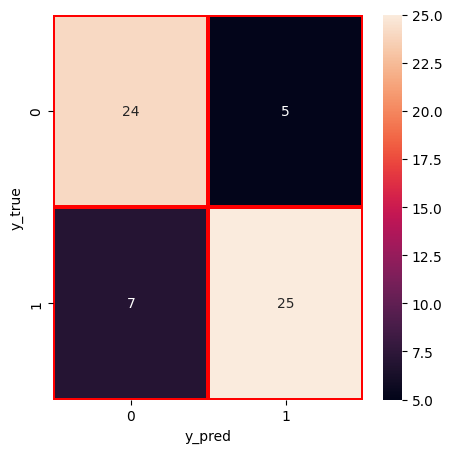


              precision    recall  f1-score   support

           0       0.77      0.83      0.80        29
           1       0.83      0.78      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



In [59]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))